# Natural Language Processing

## Exercise Sheet 2

In [1]:
#imports for all exercises
import nltk
nltk.download('inaugural')
nltk.download('names')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('udhr')

from nltk import FreqDist
from nltk import ConditionalFreqDist
from nltk import bigrams
from nltk.corpus import inaugural
from nltk.corpus import names
from nltk.corpus import wordnet as wn
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import udhr
import matplotlib.pyplot as plt

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


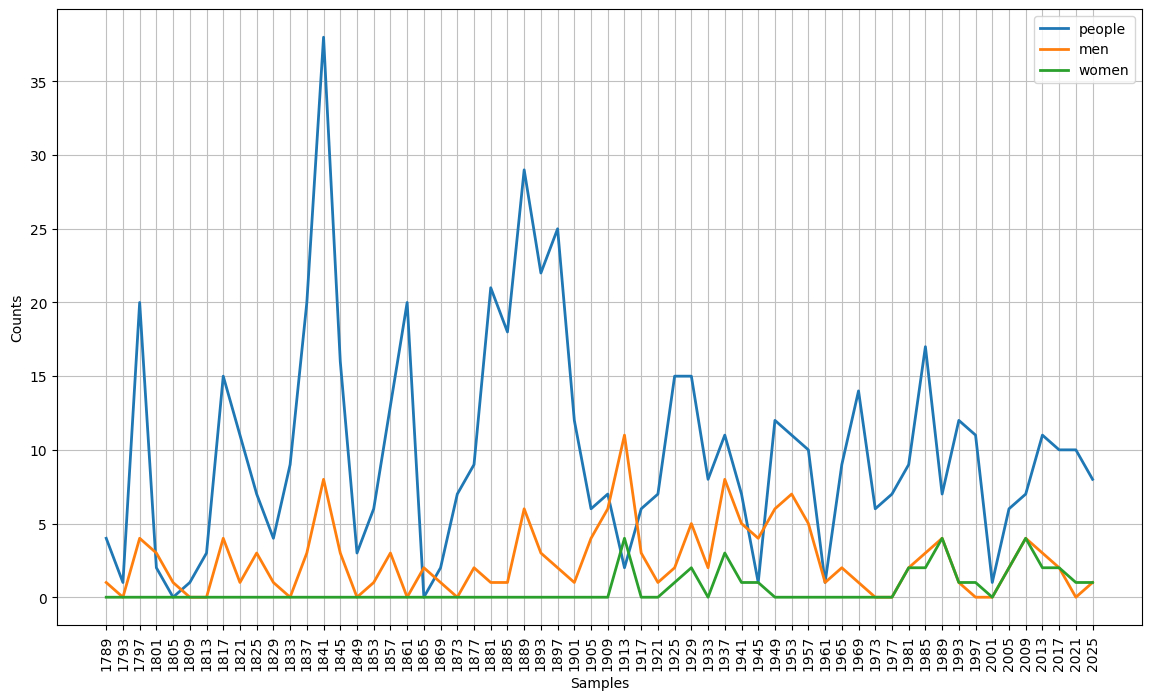

In [2]:
cfd = ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in ['men', 'women', 'people']
    if word.lower() == target
)
plt.figure(figsize=(14, 8))
cfd.plot()
plt.show()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

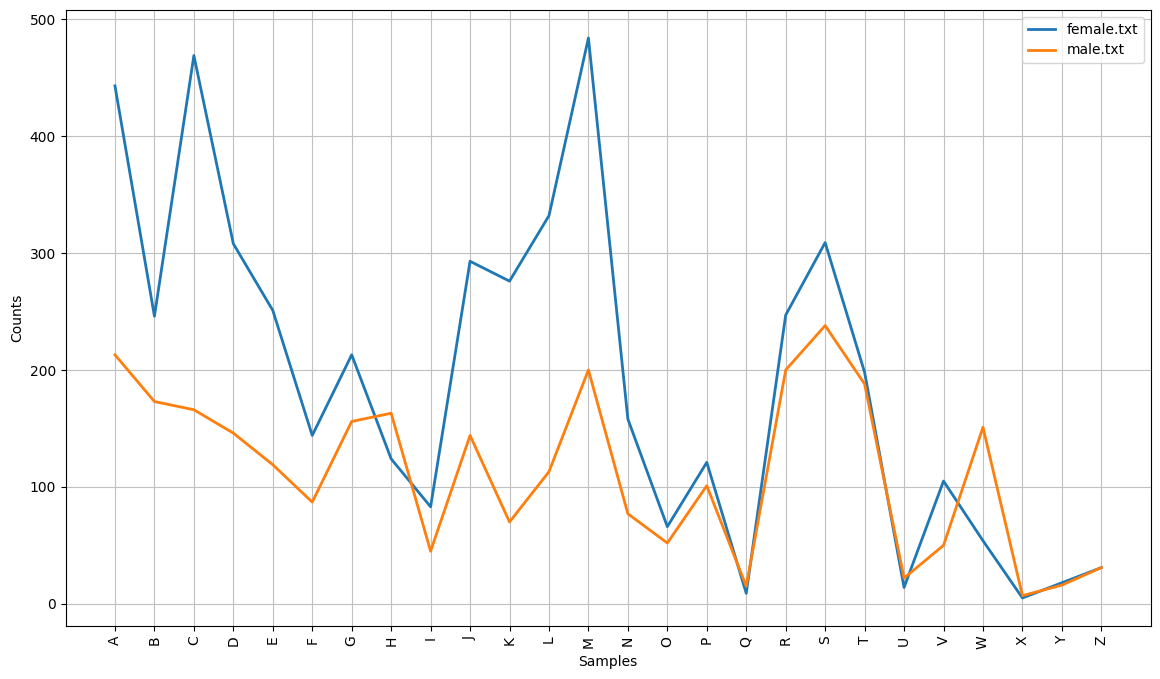

In [3]:
# Create a ConditionalFreqDist of initial letters based on gender
cfd = ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

# Plot the conditional frequency distribution
plt.figure(figsize=(14, 8))
cfd.plot()
plt.show()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [4]:
# Get all noun synsets
nouns_in_wordnet = list(wn.all_synsets('n'))

# Count the number of noun synsets with no hyponyms using filter and lambda
no_hyponyms_counter = len(list(filter(lambda synset: not synset.hyponyms(), nouns_in_wordnet)))

# Calculate the percentage
total_noun_synsets = len(nouns_in_wordnet)
synset_percentage_without_hyponyms = (no_hyponyms_counter / total_noun_synsets) * 100 if total_noun_synsets > 0 else 0

print(f"Percentage of noun synsets with no hyponyms: {synset_percentage_without_hyponyms:.2f}%")

Percentage of noun synsets with no hyponyms: 79.67%


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [5]:
def supergloss(s):
  definitions = []

  # Add synset definitions
  if s.definition():
      definitions.append(s.definition())

  # Add hypernyms definitions
  for hypernym in s.hypernyms():
      if hypernym.definition():
          definitions.append(hypernym.definition())

  # Add hyponyms definitions
  for hyponym in s.hyponyms():
      if hyponym.definition():
          definitions.append(hyponym.definition())

  return "\n".join(definitions)

# Apply the function to the synset "car.n.01"
print(f"Supergloss for 'car.n.01':\n{supergloss(wn.synset('car.n.01'))}")

Supergloss for 'car.n.01':
a motor vehicle with four wheels; usually propelled by an internal combustion engine
a self-propelled wheeled vehicle that does not run on rails
a car suitable for traveling over rough terrain
a car that is powered by electricity
a steam-powered automobile
a car that is lent as a replacement for one that is under repair
a car that is even smaller than a subcompact car
a car modified to increase its speed and acceleration
a small and economical car
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car having a hatchback door
a car that is closed and that has front and rear seats and two or four doors
a small low car with a high-powered engine; usually seats two persons
a car that resembles a convertible but has a fixed rigid top
a car kept in dealers' stock for regular sales
the first widely available automobile powered by a gasoline engine; mass-produced by Henry Ford from 1908 to 1927
a car driven by 

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [6]:

def find_frequent_words(n: int) -> list[str]:
    fdist = FreqDist(word.lower() for word in brown.words())
    frequent_words = [word for word, freq in fdist.items() if freq >= n]
    return frequent_words

# Call the function with  value n=200
frequent_words_200 = find_frequent_words(200)

print(f"Words occurring at least 200 times in the Brown Corpus:\n{frequent_words_200}")

Words occurring at least 200 times in the Brown Corpus:
['the', 'said', 'an', 'of', '``', 'no', 'evidence', "''", 'that', 'any', 'took', 'place', '.', 'further', 'in', 'city', ',', 'which', 'had', 'and', 'for', 'was', 'been', 'by', 'court', 'to', 'possible', 'only', 'a', 'such', 'interest', 'number', 'this', 'it', 'did', 'find', 'many', 'are', 'or', 'often', 'act', 'have', 'these', 'end', 'them', 'on', 'other', 'among', 'well', 'best', 'both', 'however', 'two', 'should', 'be', 'cost', 'department', 'is', 'as', 'result', 'take', 'problem', 'law', 'also', 'next', 'provide', 'so', 'may', 'at', 'state', 'federal', 'child', 'one', 'major', 'general', 'program', 'but', 'has', 'seen', 'through', 'all', 'with', 'money', 'they', 'might', 'our', 'less', 'we', 'feel', 'future', 'some', 'available', 'do', 'will', 'under', 'its', 'found', 'into', 'fact', 'effect', 'from', 'new', 'when', '1', 'political', 'not', 'there', ':', '(', ')', 'four', 'night', '2', 'work', 'plan', 'tax', 'office', 'his', 'w

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [7]:
def lexical_diversity(text: list[str]) -> float:
  return len(set(text)) / len(text) if len(text) > 0 else 0

# Calculate and print the lexical diversity for each genre
print("Lexical diversity scores for Brown Corpus genres:")
for genre in brown.categories():
  genre_words = brown.words(categories=genre)
  diversity_score = lexical_diversity(genre_words)
  print(f"{genre}: {diversity_score:.4f}")

Lexical diversity scores for Brown Corpus genres:
adventure: 0.1280
belles_lettres: 0.1064
editorial: 0.1605
fiction: 0.1358
government: 0.1167
hobbies: 0.1449
humor: 0.2313
learned: 0.0927
lore: 0.1315
mystery: 0.1221
news: 0.1431
religion: 0.1618
reviews: 0.2119
romance: 0.1207
science_fiction: 0.2234


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus.



In [8]:
def find_most_frequent_non_stopwords(text: list[str]):
  english_stopwords = set(stopwords.words('english'))
  words = [word.lower() for word in text if word.isalpha() and word.lower() not in english_stopwords]
  fdist = FreqDist(words)
  return fdist.most_common(50)

# Apply the function to the "news" genre of the Brown Corpus
news_words = brown.words(categories='news')
frequent_non_stopwords_news = find_most_frequent_non_stopwords(news_words)

print(f"Top 50 most frequent non-stopwords in the 'news' genre:\n")
for word, frequency in frequent_non_stopwords_news:
  print(f"{word}: {frequency}")

Top 50 most frequent non-stopwords in the 'news' genre:

said: 406
would: 246
new: 241
one: 213
last: 177
two: 174
first: 158
state: 153
year: 142
president: 142
home: 132
also: 129
made: 107
time: 103
years: 102
three: 101
house: 97
week: 94
city: 93
may: 93
school: 87
could: 87
four: 82
day: 76
committee: 75
man: 74
members: 74
back: 73
government: 73
many: 72
national: 72
university: 70
bill: 69
get: 68
high: 68
work: 67
since: 67
american: 67
program: 66
kennedy: 66
night: 65
john: 65
board: 64
administration: 62
meeting: 62
county: 61
per: 61
even: 61
states: 60
tax: 58


### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus.


In [9]:
def find_frequent_non_stopwords_bigrams(text: list[str]):
    english_stopwords = set(stopwords.words('english'))
    words = [word.lower() for word in text if word.isalpha()]

    # Generate bigrams and filter out those containing stopwords
    filtered_bigrams = [
        (w1, w2) for w1, w2 in bigrams(words)
        if w1 not in english_stopwords and w2 not in english_stopwords
    ]

    # Calculate frequency distribution of the filtered bigrams
    fdist = FreqDist(filtered_bigrams)
    return fdist.most_common(50)

# Apply the function to the "news" genre of the Brown Corpus
news_words = brown.words(categories='news')
frequent_non_stopwords_bigrams_news = find_frequent_non_stopwords_bigrams(news_words)

print(f"Top 50 most frequent non-stopwords bigrams in the 'news' genre:\n")
for bigram, frequency in frequent_non_stopwords_bigrams_news:
  print(f"{bigram}: {frequency}")

Top 50 most frequent non-stopwords bigrams in the 'news' genre:

('new', 'york'): 52
('per', 'cent'): 50
('united', 'states'): 37
('last', 'week'): 35
('last', 'year'): 34
('white', 'house'): 29
('high', 'school'): 23
('home', 'runs'): 23
('president', 'kennedy'): 20
('last', 'night'): 18
('years', 'ago'): 15
('san', 'francisco'): 15
('premier', 'khrushchev'): 13
('kansas', 'city'): 13
('vice', 'president'): 12
('los', 'angeles'): 12
('united', 'nations'): 11
('new', 'orleans'): 11
('police', 'said'): 11
('sales', 'tax'): 10
('two', 'years'): 10
('american', 'catholic'): 10
('el', 'paso'): 9
('social', 'security'): 9
('kennedy', 'administration'): 9
('first', 'time'): 9
('country', 'club'): 9
('rules', 'committee'): 9
('air', 'force'): 9
('tax', 'bill'): 9
('grand', 'jury'): 8
('jury', 'said'): 8
('city', 'council'): 8
('would', 'like'): 8
('rhode', 'island'): 8
('president', 'said'): 8
('weeks', 'ago'): 8
('american', 'league'): 8
('home', 'run'): 8
('higher', 'education'): 8
('collec

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [10]:
def word_freq(word: str, genre: str) -> float:
    genre_words = [word.lower() for word in brown.words(categories=genre)]
    fdist = FreqDist(genre_words)
    return fdist[word.lower()] / len(genre_words) if len(genre_words) > 0 else 0

# Compute the frequency of "love" in "news" vs. "romance" genre
love_freq_news = word_freq("love", "news")
love_freq_romance = word_freq("love", "romance")

print(f"Frequency of 'love' in the 'news' genre: {love_freq_news:.6f}")
print(f"Frequency of 'love' in the 'romance' genre: {love_freq_romance:.6f}")

Frequency of 'love' in the 'news' genre: 0.000030
Frequency of 'love' in the 'romance' genre: 0.000514


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [11]:
def find_language(target_word: str) -> list[str]:
    languages = []
    for fileid in udhr.fileids():
        # Check if the file is in Latin-1 encoding
        if 'Latin1' in fileid:
            if target_word.lower() in (word.lower() for word in udhr.words(fileid)):
                # Extract the language name from the fileid
                language = fileid.split('-')[0]
                languages.append(language)
    return languages

# Find the languages for the string "basis"
languages_for_string_basis = find_language("basis")

print(f"Languages for the string 'basis': {languages_for_string_basis}")

Languages for the string 'basis': ['Afrikaans', 'English', 'Luxembourgish_Letzebuergeusch']


### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average?

In [12]:
# Get all noun synsets
noun_synsets = list(wn.all_synsets('n'))

# Filter for synsets that have hyponyms and count their hyponyms
hyponym_counts = [len(ss.hyponyms()) for ss in noun_synsets if ss.hyponyms()]

# Calculate the average branching factor
average_branching_factor = sum(hyponym_counts) / len(hyponym_counts) if hyponym_counts else 0

print(f"Average branching factor of the noun hypernym hierarchy: {average_branching_factor:.2f}")

Average branching factor of the noun hypernym hierarchy: 4.54
